In [60]:
# Importamos las librerias necesarias:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##  Dataset: Nivel de riesgo maternal 

Los datos del dataset elegido se han recogido datos de diferentes hospitales, clínicas comunitarias y centros de salud materna de las zonas rurales de Bangladesh a través de un sistema de seguimiento de riesgos. Se definen algunos de los factores de riesgo mas importantes y significativos en la mortalidad materna.

In [61]:
# Importamos el dataset:
df=pd.read_csv('Maternal Health Risk Data Set.csv')

In [62]:
# Mostramos en pantalla las 5 primeras columnas:
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [63]:
print('El dataset tiene ', df.shape[0], ' filas y', df.shape[1], 'columnas')

El dataset tiene  1014  filas y 7 columnas


Descripción de las variables:

•	Edad: edad en años cuando una mujer durante el embarazo.

•	Presión Sistólica: valor superior de la tensión arterial en mmHg.

•	Presión Diastólica: valor mínimo de la tensión arterial en mmHg.

•	BS: niveles de glucosa en sangre.

•	Temperatura corporal: temperatura del cuerpo.

•	Frecuencia cardiaca: frecuencia cardíaca en reposo normal.

•	Nivel de riesgo: nivel de intensidad de riesgo previsto durante el embarazo teniendo en cuenta los atributos anteriores.

In [64]:
# Mostramos el tipo de dato de cada columna:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [65]:
# Examinamos si hay datos nulos en el dataset:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# Análisis exploratorio de datos

In [66]:
df['Age'].describe()

count    1014.000000
mean       29.871795
std        13.474386
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        70.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Edad')

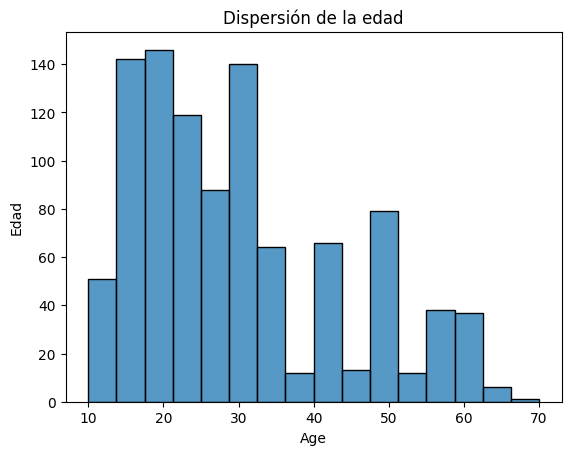

In [67]:
hist_age=sns.histplot(data=df, x='Age')
hist_age.set_title('Dispersión de la edad')
hist_age.set_ylabel('Edad')

El promedio de la edad de las mujeres en estudio es de 30 años aproximadamente, con un mínimo de 10 años y un máximo de 70. El 75% de los datos se ubican por debajo de los 40 años. 

In [68]:
df[['SystolicBP', 'DiastolicBP']].describe()

,SystolicBP,DiastolicBP
count,1014.000000,1014.000000
mean,113.198225,76.460552
std,18.403913,13.885796
min,70.000000,49.000000
25%,100.000000,65.000000
50%,120.000000,80.000000
75%,120.000000,90.000000
max,160.000000,100.000000


Text(0, 0.5, 'Presión ')

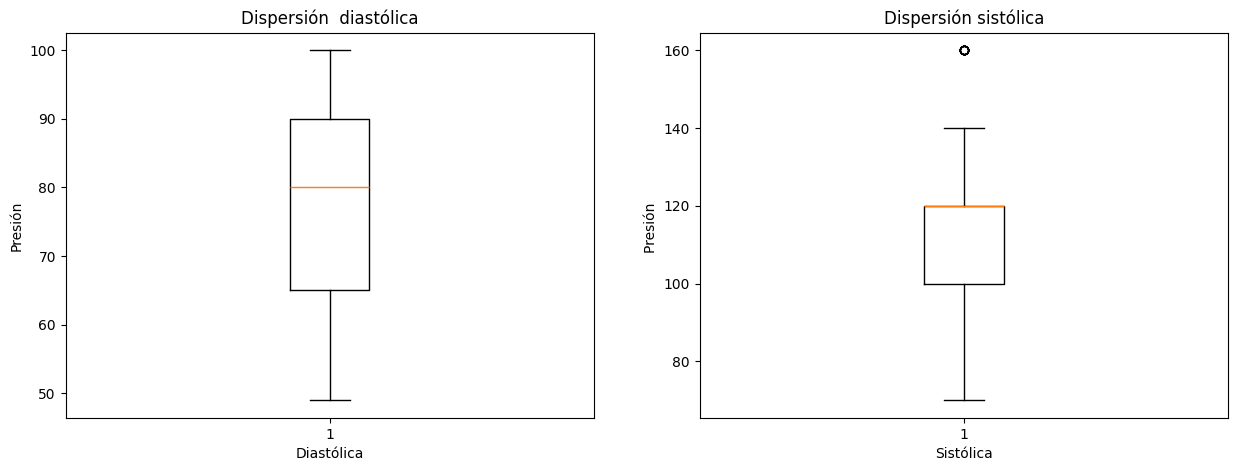

In [69]:
fig, axs = plt.subplots(1, 2 ,figsize=(15, 5))

axs[0].boxplot(df['DiastolicBP'])
axs[0].set_title('Dispersión  diastólica')
axs[0].set_xlabel('Diastólica')
axs[0].set_ylabel('Presión')

axs[1].boxplot(df['SystolicBP'])
axs[1].set_title('Dispersión sistólica')
axs[1].set_xlabel('Sistólica')
axs[1].set_ylabel('Presión ')

La presión sistólica se mide cuando el los ventrículos del corazón se contraen. La presión diastólica se mide cuando el los ventrículos del corazón se relajan. Una presión sistólica de 120 milímetros de mercurio se considera en el rango de los niveles de presión normales, mientras que para la diastólica es de 80.

El promedio de la presión sistólica en el dataset esta por debajo de lo normal pero el 75% de los datos se sitúan en 120 o menos. En cambio, la presión diastólica es levemente superior a lo normal en el 75% de las personas, ubicándose en 90. 

In [70]:
df['BS'].describe()

count    1014.000000
mean        8.725986
std         3.293532
min         6.000000
25%         6.900000
50%         7.500000
75%         8.000000
max        19.000000
Name: BS, dtype: float64

Text(0, 0.5, 'Nivel de glucosa')

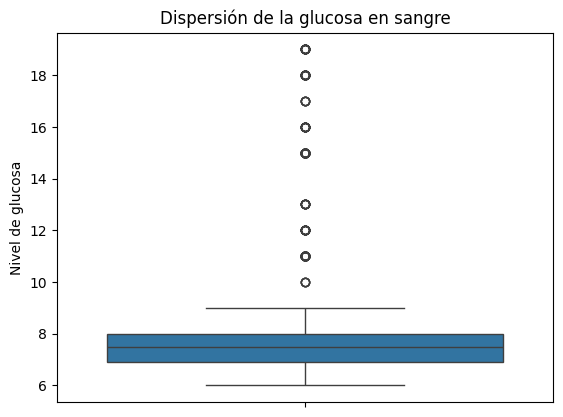

In [71]:
bs_box=sns.boxplot(data=df, y='BS')
bs_box.set_title('Dispersión de la glucosa en sangre')
bs_box.set_ylabel('Nivel de glucosa')

La mayoría de los registros de la glucosa en sangre esta por debajo de 8. El nivel máximo es de 19 pero a partir de 10 se podrían considerar valores atípicos. 

In [72]:
df['HeartRate'].describe()

count    1014.000000
mean       74.301775
std         8.088702
min         7.000000
25%        70.000000
50%        76.000000
75%        80.000000
max        90.000000
Name: HeartRate, dtype: float64

Text(0, 0.5, 'Frecuencia cardiaca')

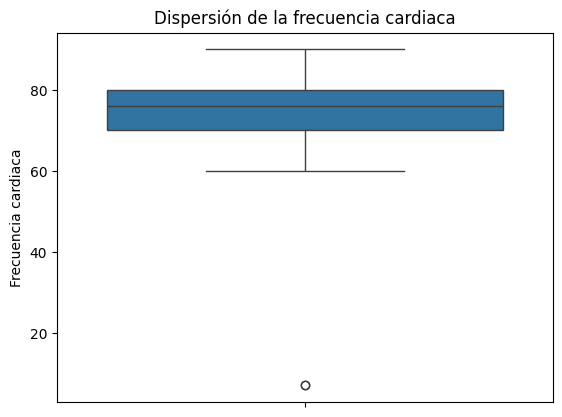

In [73]:
bs_box=sns.boxplot(data=df, y='HeartRate')
bs_box.set_title('Dispersión de la frecuencia cardiaca')
bs_box.set_ylabel('Frecuencia cardiaca')

Durante el embarazo, la cantidad de sangre que bombea el corazón (gasto cardíaco) aumenta entre un 30% y un 50%. A medida que esto ocurre, la frecuencia cardíaca en reposo asciende desde el valor normal de 70 latidos por minuto antes del embarazo hasta incluso 90 latidos por minuto.

Text(0.5, 0, 'Nivel de riesgo')

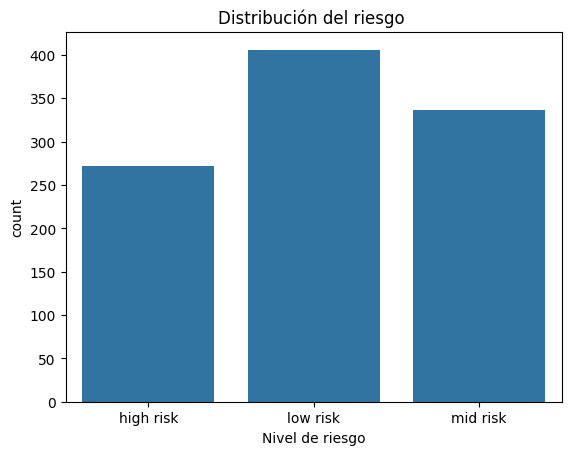

In [74]:
risk_level_bar=sns.countplot(data=df, x='RiskLevel')
risk_level_bar.set_title('Distribución del riesgo ')
risk_level_bar.set_xlabel('Nivel de riesgo')

Podemos observar que la variable target no se encuentra equilibrada ya que hay mas registros con un riesgo medio y bajo que con riesgo alto. 

# Modelos 

El objetivo del proyecto es predecir el nivel de riesgo previsto teniendo en cuenta los factores de riesgo presentes en el dataset. 
La variable objetivo presenta tres categorías distintas: nivel medio, riesgo bajo y riesgo alto. Por lo tanto, utilizaremos modelos predictivos y métricas adecuadas para realizar predicciones en un contexto multiclase

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

Definimos dos funciones que utilizaremos en forma recurrente. Una para dividir el dataframe en test y train, en una relacion 75-25. A la vez que se separa la variable de salida con las variables de entrada. En este caso no se usar cross validation ya que la cantidad de registros no son demasiados por lo que no amerita utilizar esta técnica.
La otra función es para calcular y mostrar las métricas elegidas para evaluar el modelo, en este caso usaremos la matriz de confusión y el reporte de clasificación.

In [76]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['RiskLevel'])
    train_set_y= train_set['RiskLevel']
    test_set_x=test_set.drop(columns=['RiskLevel'])
    test_set_y= test_set['RiskLevel']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
   table=confusion_matrix(set, predict_set)
   sns.heatmap(table, cmap='Blues',annot=True,fmt='g')
   plt.xlabel('Predicted')
   plt.ylabel('True')
   print(classification_report(set, predict_set))

In [77]:
# Transformamos la variable target de categórica a numérica para poder entrenar el modelo:
df['RiskLevel'] = df['RiskLevel'].replace('high risk', 0)
df['RiskLevel'] = df['RiskLevel'].replace('low risk', 1)
df['RiskLevel'] = df['RiskLevel'].replace('mid risk', 2)

In [78]:
# Dividimos en dataset en entrenamiento y testeo:
train_set_x, train_set_y, test_set_x, test_set_y= split_train_test(df)
print('Train set: ',len(train_set_x))
print('Test set: ',len(test_set_x))

Train set:  760
Test set:  254


Árbol de decisión 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       204
           1       0.94      0.93      0.94       301
           2       0.91      0.91      0.91       255

    accuracy                           0.94       760
   macro avg       0.94      0.94      0.94       760
weighted avg       0.94      0.94      0.94       760



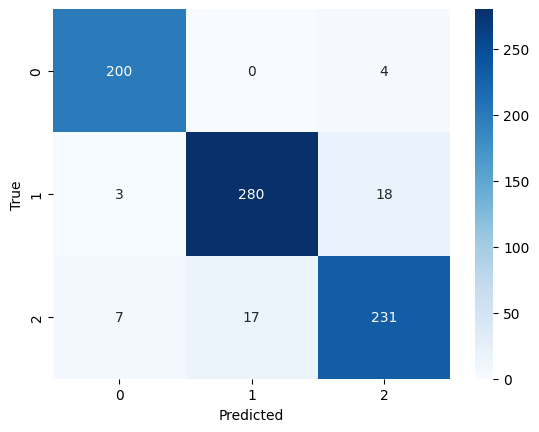

In [79]:
# Entrenamos un árbol de decisión y lo probamos con el conjunto de entrenamiento:
arbol = DecisionTreeClassifier(random_state=3) 
arbol.fit(train_set_x, train_set_y)
arbol_predict_y_train= arbol.predict(train_set_x)
ver_metricas(train_set_y, arbol_predict_y_train)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        68
           1       0.88      0.81      0.84       105
           2       0.77      0.78      0.77        81

    accuracy                           0.82       254
   macro avg       0.82      0.83      0.82       254
weighted avg       0.82      0.82      0.82       254



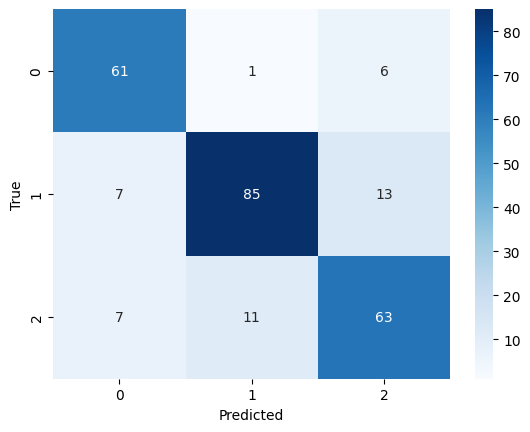

In [80]:
# Probamos el árbol de decisión con el conjunto de testeo:
arbol_predict_y_test= arbol.predict(test_set_x)
ver_metricas(test_set_y, arbol_predict_y_test)

Al analizar las métricas obtenidas tanto del conjunto de entrenamiento como del de testeo, podemos notar un ligero sobreajuste en los datos, evidenciado por una diferencia de 0.12 entre ambos conjuntos.

KNN

A continuación, entrenaremos un modelo KNN donde probaremos modificando el hiperparametro n_neighbors y ver su comportamiento utilizando la métrica recall como guía.

In [81]:
# Entrenamos un algoritmo KNN con diferentes números de vecinos cercanos, predecimos y almacenamos la métrica obtenida:
metricas_train=[]
metricas_test=[]
n_neighbors=[3,4,5,6,7,8,9,10]

for neighbor in n_neighbors:
    KNN_Classifier = KNeighborsClassifier(n_neighbors=neighbor)
    KNN_Classifier.fit(train_set_x, train_set_y)
    KNN_Classifier_predict_train=KNN_Classifier.predict(train_set_x)
    KNN_Classifier_predict_test=KNN_Classifier.predict(test_set_x)
    metric=f1_score(train_set_y,KNN_Classifier_predict_train,average='macro')
    metricas_train.append(metric)
    metric=f1_score(test_set_y,KNN_Classifier_predict_test, average='macro')
    metricas_test.append(metric)

Text(0, 0.5, 'Nº vecinos cercanos')

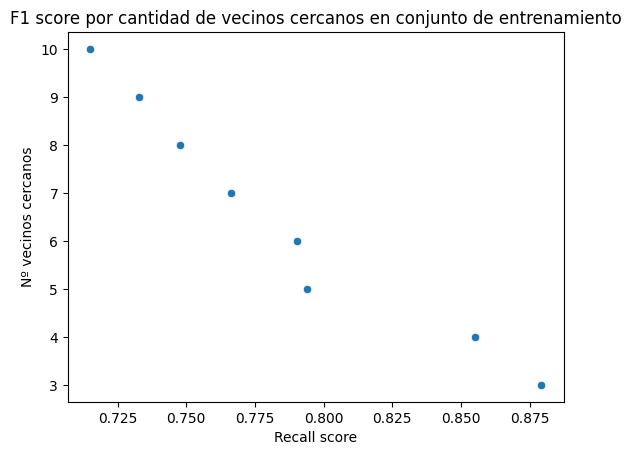

In [82]:
sns.scatterplot(x=metricas_train, y=n_neighbors)
plt.title('F1 score por cantidad de vecinos cercanos en conjunto de entrenamiento')
plt.xlabel('Recall score')
plt.ylabel('Nº vecinos cercanos')

Text(0, 0.5, 'Nº vecino cercanos')

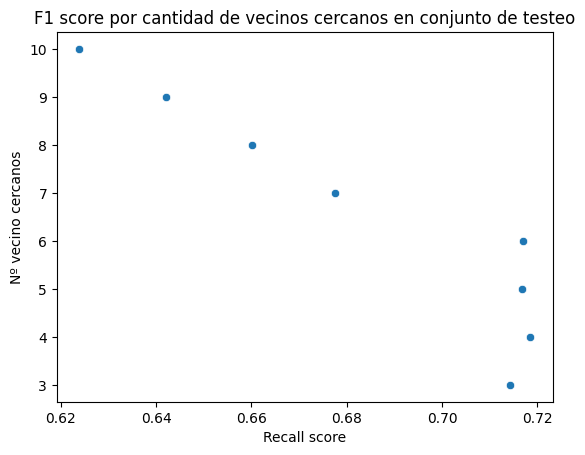

In [83]:
sns.scatterplot(x=metricas_test, y=n_neighbors)
plt.title('F1 score por cantidad de vecinos cercanos en conjunto de testeo')
plt.xlabel('Recall score')
plt.ylabel('Nº vecino cercanos')

Conclusión:

El modelo que muestra un mejor desempeño en el análisis es el árbol de decisión, que alcanza un F1 promedio de 0.83 en el conjunto de testeo, mientras que el algoritmo KNN se queda en 0.72.

Además, es relevante destacar que la clase con la mejor métrica corresponde a la que tiene menos registros en el conjunto de datos. Esto nos lleva a concluir que el desbalanceo de clases que identificamos durante el análisis no parece tener un impacto significativo en el rendimiento de los modelos.
